In [2]:
# Import the KMeans algorithm from the sklearn.cluster module
from sklearn.cluster import KMeans

# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the MinMaxScaler and StandardScaler from sklearn.preprocessing for feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import the pyplot module from matplotlib for data visualization
from matplotlib import pyplot as plt

# This line is used in Jupyter notebooks to display matplotlib plots inline within the notebook
%matplotlib inline


# Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.



In [3]:
# Read a CSV file named 'Mall_Customers.csv' into a Pandas DataFrame
df = pd.read_csv('Mall_Customers.csv')

# Display the first 5 rows of the DataFrame to get a quick look at the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Drop the columns 'CustomerID' and 'Gender' from the DataFrame in place.
# 'inplace=True' modifies the original DataFrame without needing to reassign it.
df.drop(columns=['CustomerID', 'Gender'], inplace=True)

# Display the first 5 rows of the modified DataFrame to verify the changes.
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
# This code detects missing values in the DataFrame `df`.
# The `isna()` function returns a DataFrame of the same shape as `df`, where each element is a boolean indicating if the value is missing (NaN).
# The `sum()` function is then called on this boolean DataFrame, which calculates the total number of missing values for each column.
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
#Check descriptive statistics
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Standardization of the data
To ensure each feature contributes equally to the distance metric
The formula for standardizing a data point 𝑥

𝑧 = 𝑥 − μ / 𝜎 

where:
z is the standardized value.
x is the original data point.
μ is the mean of the data set.
σ is the standard deviation of the data set.


In [6]:
# This code initializes a StandardScaler object, which will be used to standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()

In [8]:
# This code standardizes the 'Age' and 'Annual Income (k$)' columns using StandardScaler and assigns the transformed values to new columns 'Age_T' and 'Annual Income (k$)_T'.
df[['Age_T', 'Annual Income (k$)_T']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)']])

# Displays the first few rows of the DataFrame to verify the changes.
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Age_T,Annual Income (k$)_T
0,19,15,39,-1.424569,-1.738999
1,21,15,81,-1.281035,-1.738999
2,20,16,6,-1.352802,-1.700830
3,23,16,77,-1.137502,-1.700830
4,31,17,40,-0.563369,-1.662660


# Determine Optimum Value for k

In [9]:
def optimum_k_value(data, max_k):
    means = [] # store values of k
    inertias = [] # store sum of squared errors

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k) # create KMeans with k clusters
        kmeans.fit(data) # fit KMeans to data

        inertias.append(kmeans.inertia_) # append inertia to list
        means.append(k) # append k to list
        print(f'k:{k}, inertia:{kmeans.inertia_}') # print k and inertia

    return means, inertias # return lists of k and inertia values


In [59]:
optimum_k_value(df[['Age_T', 'Annual Income (k$)_T']], 20)

/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

k:1, inertia:400.0
k:2, inertia:250.58811570754693
k:3, inertia:132.8553042122192
k:4, inertia:103.05151849277249
k:5, inertia:81.40819144310571
k:6, inertia:67.36790953035509
k:7, inertia:54.16125645443167
k:8, inertia:48.03467063123222
k:9, inertia:41.571485172167776
k:10, inertia:37.56170048407982
k:11, inertia:33.08244940465558
k:12, inertia:30.0338946281573
k:13, inertia:26.56724596014544
k:14, inertia:25.02949210367651
k:15, inertia:22.617223317215107
k:16, inertia:21.222765583989457
k:17, inertia:20.06060619627349
k:18, inertia:18.307153965315194
k:19, inertia:17.05837302085555


/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [400.0,
  250.58811570754693,
  132.8553042122192,
  103.05151849277249,
  81.40819144310571,
  67.36790953035509,
  54.16125645443167,
  48.03467063123222,
  41.571485172167776,
  37.56170048407982,
  33.08244940465558,
  30.0338946281573,
  26.56724596014544,
  25.02949210367651,
  22.617223317215107,
  21.222765583989457,
  20.06060619627349,
  18.307153965315194,
  17.05837302085555])

/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k:1, inertia:400.0
k:2, inertia:250.58811570754693
k:3, inertia:132.8553042122192
k:4, inertia:103.05151849277249
k:5, inertia:81.40819144310571


/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

k:6, inertia:67.34237950235075
k:7, inertia:54.83486840286751
k:8, inertia:48.21197251875388
k:9, inertia:41.738145051143945
k:10, inertia:37.38414538324188
k:11, inertia:33.22348091167911
k:12, inertia:29.77577755468937
k:13, inertia:26.51502915503763
k:14, inertia:25.26156076414233
k:15, inertia:22.883421750253227
k:16, inertia:21.367178356731166
k:17, inertia:19.998363560329338
k:18, inertia:18.218905752119845
k:19, inertia:17.64380608772584


/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

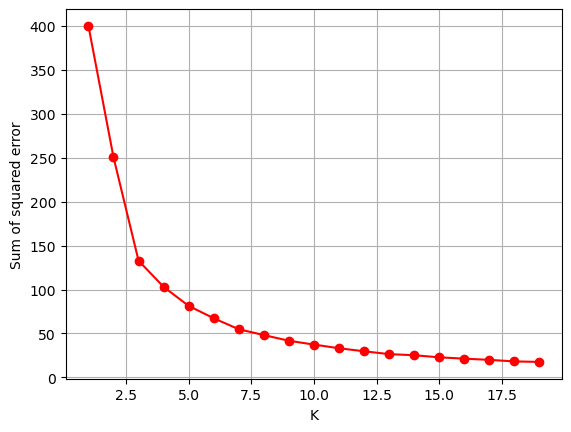

In [10]:
# Calculate means and inertias using KMeans clustering for up to 20 clusters based on transformed features
means, inertias = optimum_k_value(df[['Age_T', 'Annual Income (k$)_T']], 20)

# Set x-axis label as 'K' and y-axis label as 'Sum of squared error'
plt.xlabel('K')
plt.ylabel('Sum of squared error')

# Plot means vs. inertias with red markers, solid line, and markers represented as circles
plt.plot(means, inertias, color='red', marker='o', linestyle='-')

# Enable grid lines for clarity
plt.grid(True)

# Display the plot
plt.show()

In [11]:
# Initialize KMeans clustering model with 5 clusters
km = KMeans(n_clusters=5)

# Fit the model and predict clusters based on 'Age_T' and 'Annual Income (k$)_T' features
y_pred = km.fit_predict(df[['Age_T', 'Annual Income (k$)_T']])


/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [72]:
# Display the prediction
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 2, 3, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 3,
       3, 1, 2, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 2, 3, 1, 3, 2, 1, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 4, 1, 3, 4, 3, 4, 3, 4, 4, 1, 3,
       1, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [12]:
# Add a new column 'Clusters' to the DataFrame with the predicted cluster labels
df['Clusters'] = y_pred
df

,Age,Annual Income (k$),Spending Score (1-100),Age_T,Annual Income (k$)_T,Clusters
0,19,15,39,-1.424569,-1.738999,3
1,21,15,81,-1.281035,-1.738999,3
2,20,16,6,-1.352802,-1.700830,3
3,23,16,77,-1.137502,-1.700830,3
4,31,17,40,-0.563369,-1.662660,3
...,...,...,...,...,...,...
195,35,120,79,-0.276302,2.268791,2
196,45,126,28,0.441365,2.497807,2
197,32,126,74,-0.491602,2.497807,2
198,32,137,18,-0.491602,2.917671,2


In [82]:
km.cluster_centers_ # x and y coordinates for each of the clusters 0 to 4

array([[-0.81371743, -1.17799735],
       [ 0.51639395,  0.30219778],
       [ 1.42995129, -0.63113151],
       [-0.86570478,  0.4017373 ],
       [-0.16313121,  1.68156888]])

<function matplotlib.pyplot.legend(*args, **kwargs)>

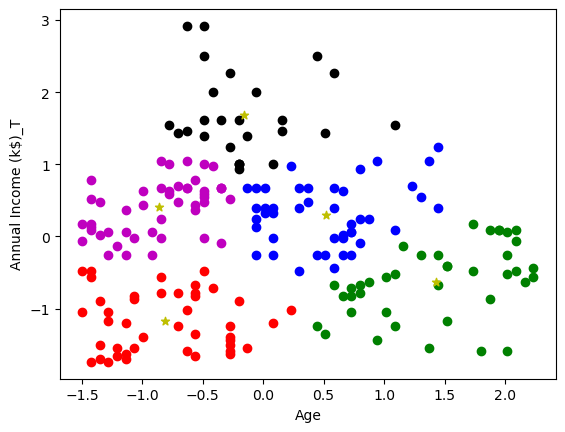

In [83]:
#Plot the Scatter plot

df1 = df[df.Clusters==0]
df2 = df[df.Clusters==1]
df3 = df[df.Clusters==2]
df4 = df[df.Clusters==3]
df5 = df[df.Clusters==4]

plt.scatter(df1.Age_T, df1['Annual Income (k$)_T'], color='r')
plt.scatter(df2.Age_T, df2['Annual Income (k$)_T'], color='b')
plt.scatter(df3.Age_T, df3['Annual Income (k$)_T'], color='g')
plt.scatter(df4.Age_T, df4['Annual Income (k$)_T'], color='m')
plt.scatter(df5.Age_T, df5['Annual Income (k$)_T'], color='k')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='y', marker="*", label='centroid')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)_T')
plt.legend